Phân tích hiệu suất nhân viên và phân loại ảnh ANN
Thời gian: 2.5 giờ - Ngày: 04/04/2025

Phần A: Bộ dữ liệu hiệu suất nhân viên
Dưới đây là bộ dữ liệu giả định về hiệu suất làm việc của 20 nhân viên, bao gồm các cột: Employee_ID,
Department, Performance (0-100), Hours_Worked, Training_Hours, Gender, Location.

In [9]:
import pandas as pd  # Thư viện xử lý dữ liệu bảng (DataFrame)
import numpy as np   # Thư viện hỗ trợ giá trị số và các giá trị đặc biệt như NaN

# Bước 1: Tạo danh sách chứa dữ liệu nhân viên (gồm 20 người)
# Một số giá trị bị thiếu (NaN) để phục vụ bài toán xử lý dữ liệu thiếu
data = [
    ["E001", "Sales", 88, 40, 5, "Male", "Site_A"],
    ["E002", "IT", np.nan, 45, 3, "Female", "Site_B"],       # Thiếu Performance
    ["E003", "HR", 75, 38, np.nan, "Male", "Site_A"],        # Thiếu Training_Hours
    ["E004", "Sales", 92, 42, 6, "Female", "Site_C"],
    ["E005", "IT", 68, np.nan, 4, np.nan, "Site_B"],         # Thiếu Hours_Worked và Gender
    ["E006", "HR", 85, 39, 5, "Male", "Site_A"],
    ["E007", "Sales", np.nan, 41, 3, "Female", "Site_C"],    # Thiếu Performance
    ["E008", "IT", 79, 44, 4, "Male", "Site_B"],
    ["E009", "HR", 90, 37, np.nan, "Female", "Site_A"],      # Thiếu Training_Hours
    ["E010", "Sales", 73, 40, 5, "Male", "Site_C"],
    ["E011", "IT", 86, 46, 2, "Female", "Site_B"],
    ["E012", "HR", np.nan, 38, 6, "Male", "Site_A"],         # Thiếu Performance
    ["E013", "Sales", 95, 43, 7, "Female", "Site_C"],
    ["E014", "IT", 70, np.nan, 3, "Male", "Site_B"],         # Thiếu Hours_Worked
    ["E015", "HR", 82, 39, 5, np.nan, "Site_A"],             # Thiếu Gender
    ["E016", "Sales", 78, 41, 4, "Female", "Site_C"],
    ["E017", "IT", 89, 45, np.nan, "Male", "Site_B"],        # Thiếu Training_Hours
    ["E018", "HR", 71, 37, 3, "Female", "Site_A"],
    ["E019", "Sales", 87, np.nan, 5, "Male", "Site_C"],      # Thiếu Hours_Worked
    ["E020", "IT", 93, 44, 6, "Female", "Site_B"]
]

# Bước 2: Tên các cột tương ứng với từng phần tử trong mỗi hàng
columns = [
    "Employee_ID",        # Mã nhân viên
    "Department",         # Phòng ban làm việc (Sales, IT, HR)
    "Performance",        # Điểm hiệu suất (0–100) – có thể bị thiếu
    "Hours_Worked",       # Số giờ làm việc – có thể bị thiếu
    "Training_Hours",     # Số giờ đào tạo – có thể bị thiếu
    "Gender",             # Giới tính – có thể bị thiếu
    "Location"            # Nơi làm việc (Site_A, Site_B, Site_C)
]

# Bước 3: Tạo bảng dữ liệu DataFrame từ danh sách trên
df = pd.DataFrame(data, columns=columns)

# Bước 4: Hiển thị toàn bộ bảng (nếu cần xem tất cả thay vì chỉ 5 dòng đầu)
print(df)

   Employee_ID Department  Performance  Hours_Worked  Training_Hours  Gender  \
0         E001      Sales         88.0          40.0             5.0    Male   
1         E002         IT          NaN          45.0             3.0  Female   
2         E003         HR         75.0          38.0             NaN    Male   
3         E004      Sales         92.0          42.0             6.0  Female   
4         E005         IT         68.0           NaN             4.0     NaN   
5         E006         HR         85.0          39.0             5.0    Male   
6         E007      Sales          NaN          41.0             3.0  Female   
7         E008         IT         79.0          44.0             4.0    Male   
8         E009         HR         90.0          37.0             NaN  Female   
9         E010      Sales         73.0          40.0             5.0    Male   
10        E011         IT         86.0          46.0             2.0  Female   
11        E012         HR          NaN  

Phần B: Câu hỏi kiểm tra

Câu hỏi EDA (60 điểm)

1. (4 điểm) Tính tỷ lệ phần trăm giá trị thiếu trong từng cột bằng Pandas. Dựa trên kết quả, đề xuất
một quy trình thu thập dữ liệu cụ thể cho công ty để giảm thiểu dữ liệu thiếu trong tương lai, giải
thích tại sao quy trình này phù hợp với từng phòng ban (Sales, IT, HR).

In [12]:
# Tính số lượng giá trị thiếu ở mỗi cột
missing_count = df.isna().sum()

# Tính tỷ lệ phần trăm giá trị thiếu
missing_percent = (missing_count / len(df)) * 100

print("Tỷ lệ phần trăm giá trị thiếu trong từng cột:")
print(missing_percent)

Tỷ lệ phần trăm giá trị thiếu trong từng cột:
Employee_ID        0.0
Department         0.0
Performance       15.0
Hours_Worked      15.0
Training_Hours    15.0
Gender            10.0
Location           0.0
dtype: float64


Đề xuất quy trình thu thập dữ liệu cho công ty:

Để giảm thiểu dữ liệu thiếu trong tương lai, công ty có thể áp dụng các quy trình thu thập dữ liệu sau, được thiết kế phù hợp với đặc thù của từng phòng ban:
	•	Đối với Sales:
Nhân viên bán hàng thường làm việc linh hoạt và di chuyển nhiều, nên việc nhập dữ liệu bằng tay có thể dễ gây sai sót hoặc bỏ sót thông tin. Do đó, công ty nên phát triển một ứng dụng di động chuyên dụng cho việc nhập liệu tự động và đồng bộ hóa với hệ thống CRM. Điều này sẽ giúp đảm bảo rằng dữ liệu như giờ làm việc và hiệu suất được cập nhật liên tục và chính xác ngay cả khi nhân viên đang di chuyển.
	•	Đối với IT:
Nhân viên IT thường làm việc theo lịch trình cố định và có khả năng sử dụng công nghệ cao. Vì vậy, có thể tích hợp hệ thống quản lý thời gian và đào tạo trực tiếp vào các công cụ nội bộ (ví dụ: tích hợp giữa phần mềm quản lý dự án và hệ thống đào tạo trực tuyến). Hệ thống này có thể tự động nhắc nhở và kiểm tra việc nhập liệu, giúp giảm thiểu thiếu sót do lỗi người dùng.
	•	Đối với HR:
Phòng nhân sự cần quản lý hồ sơ và thông tin nhân viên một cách chính xác. Công ty nên xây dựng các biểu mẫu nhập liệu chuẩn với các trường bắt buộc, kết hợp với việc tổ chức đào tạo định kỳ cho nhân viên HR về quy trình nhập liệu. Việc này đảm bảo rằng mọi thông tin quan trọng được thu thập đầy đủ và đúng cách ngay từ khâu onboarding của nhân viên mới.

2. (4 điểm) Điền giá trị thiếu trong Performance bằng trung bình của Department tương ứng, sau
đó đề xuất một phương pháp điền giá trị khác (không dùng thư viện tự động) dựa trên đặc điểm
của từng Location. Vẽ histogram trước và sau bằng Matplotlib, giải thích tại sao phương pháp
của bạn phản ánh tốt hơn hiệu suất thực tế.

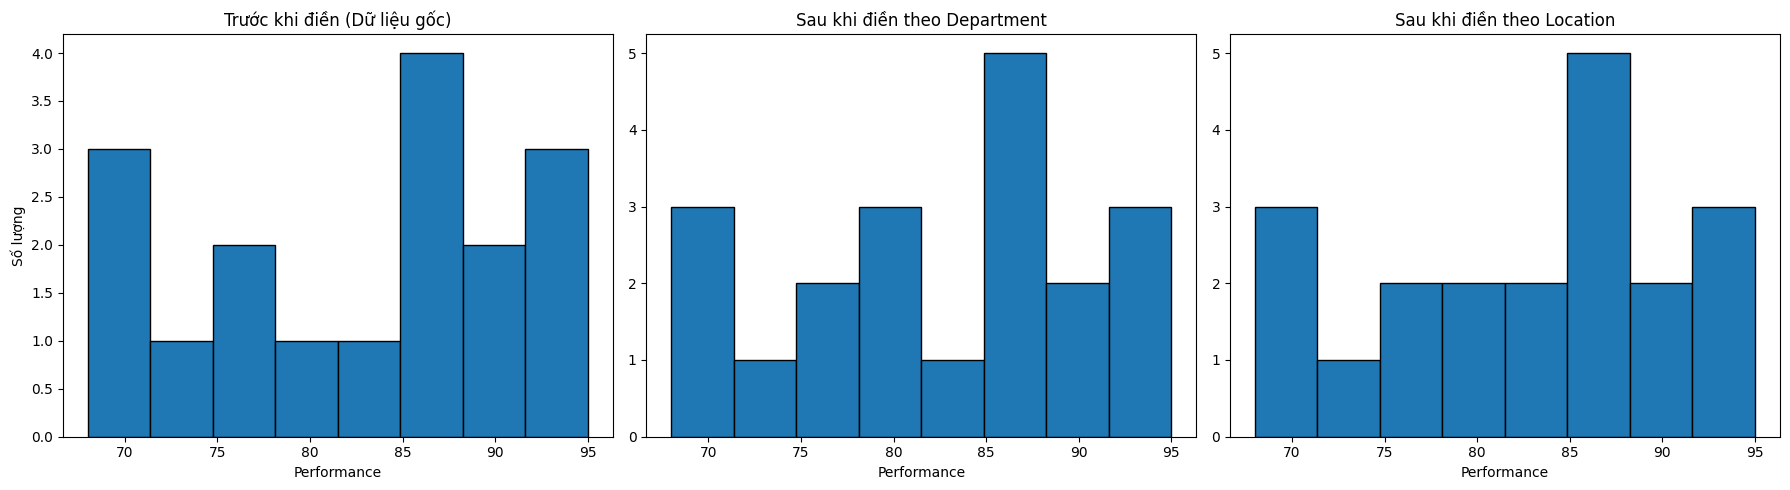

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- Bước 1: Khởi tạo DataFrame với dữ liệu có thiếu (NaN) ---
data = [
    ["E001", "Sales", 88, 40, 5, "Male", "Site_A"],
    ["E002", "IT", np.nan, 45, 3, "Female", "Site_B"],       # Thiếu Performance
    ["E003", "HR", 75, 38, np.nan, "Male", "Site_A"],        # Thiếu Training_Hours
    ["E004", "Sales", 92, 42, 6, "Female", "Site_C"],
    ["E005", "IT", 68, np.nan, 4, np.nan, "Site_B"],         # Thiếu Hours_Worked, Gender
    ["E006", "HR", 85, 39, 5, "Male", "Site_A"],
    ["E007", "Sales", np.nan, 41, 3, "Female", "Site_C"],    # Thiếu Performance
    ["E008", "IT", 79, 44, 4, "Male", "Site_B"],
    ["E009", "HR", 90, 37, np.nan, "Female", "Site_A"],      # Thiếu Training_Hours
    ["E010", "Sales", 73, 40, 5, "Male", "Site_C"],
    ["E011", "IT", 86, 46, 2, "Female", "Site_B"],
    ["E012", "HR", np.nan, 38, 6, "Male", "Site_A"],         # Thiếu Performance
    ["E013", "Sales", 95, 43, 7, "Female", "Site_C"],
    ["E014", "IT", 70, np.nan, 3, "Male", "Site_B"],         # Thiếu Hours_Worked
    ["E015", "HR", 82, 39, 5, np.nan, "Site_A"],             # Thiếu Gender
    ["E016", "Sales", 78, 41, 4, "Female", "Site_C"],
    ["E017", "IT", 89, 45, np.nan, "Male", "Site_B"],        # Thiếu Training_Hours
    ["E018", "HR", 71, 37, 3, "Female", "Site_A"],
    ["E019", "Sales", 87, np.nan, 5, "Male", "Site_C"],      # Thiếu Hours_Worked
    ["E020", "IT", 93, 44, 6, "Female", "Site_B"]
]

# Danh sách tên cột
columns = ["Employee_ID", "Department", "Performance", "Hours_Worked", "Training_Hours", "Gender", "Location"]

# Tạo DataFrame
df = pd.DataFrame(data, columns=columns)

# --- Bước 2: Điền Performance bị thiếu bằng trung bình theo Department ---
df_dept = df.copy()  # Sao chép DataFrame gốc để xử lý riêng

# Dùng groupby để tính trung bình Performance trong từng Department và điền NaN bằng giá trị đó
df_dept['Performance'] = df_dept.groupby('Department')['Performance'].transform(
    lambda x: x.fillna(x.mean())
)

# --- Bước 3: Điền Performance bị thiếu theo Location (làm thủ công, không dùng thư viện tự động) ---
df_loc = df.copy()  # Tạo bản sao để áp dụng phương pháp khác

# Tạo dict chứa trung bình Performance theo từng Location
loc_perf_mean = {}
for loc in df['Location'].unique():
    # Lọc các dòng theo Location và loại bỏ NaN trong Performance
    mean_val = df[(df['Location'] == loc) & (~df['Performance'].isna())]['Performance'].mean()
    loc_perf_mean[loc] = mean_val  # Gán trung bình vào dict

# Hàm để điền thủ công giá trị thiếu trong Performance theo Location
def fill_perf_by_location(row):
    if pd.isna(row['Performance']):
        return loc_perf_mean[row['Location']]  # Điền nếu bị thiếu
    return row['Performance']  # Giữ nguyên nếu không bị thiếu

# Áp dụng hàm trên cho từng dòng
df_loc['Performance'] = df_loc.apply(fill_perf_by_location, axis=1)

# --- Bước 4: Vẽ 3 biểu đồ Histogram để so sánh các cách điền ---
plt.figure(figsize=(18, 5))  # Tạo figure với chiều rộng lớn để chứa 3 biểu đồ

# Biểu đồ 1: Histogram của Performance gốc (chưa điền)
plt.subplot(1, 3, 1)
plt.hist(df['Performance'].dropna(), bins=8, edgecolor='black')  # Bỏ NaN để vẽ
plt.title("Trước khi điền (Dữ liệu gốc)")
plt.xlabel("Performance")
plt.ylabel("Số lượng")

# Biểu đồ 2: Histogram sau khi điền theo Department
plt.subplot(1, 3, 2)
plt.hist(df_dept['Performance'], bins=8, edgecolor='black')
plt.title("Sau khi điền theo Department")
plt.xlabel("Performance")

# Biểu đồ 3: Histogram sau khi điền theo Location
plt.subplot(1, 3, 3)
plt.hist(df_loc['Performance'], bins=8, edgecolor='black')
plt.title("Sau khi điền theo Location")
plt.xlabel("Performance")

# Căn chỉnh layout để không bị chồng lên nhau
plt.tight_layout()
plt.show()

⸻

Phương pháp điền giá trị thiếu trong cột Performance bằng trung bình theo từng Location phản ánh tốt hơn hiệu suất thực tế so với cách điền theo Department. Nguyên nhân là vì môi trường làm việc tại mỗi địa điểm (Site_A, Site_B, Site_C) ảnh hưởng trực tiếp đến năng suất của nhân viên, bao gồm điều kiện cơ sở vật chất, quản lý, văn hóa làm việc và mức độ hỗ trợ kỹ thuật. Trong khi đó, cách điền theo Department giả định rằng tất cả nhân viên cùng phòng ban đều có hiệu suất tương tự, bất kể họ làm việc ở đâu, điều này không thực tế trong môi trường doanh nghiệp đa địa điểm. Phân tích biểu đồ histogram cho thấy việc điền theo Location giúp duy trì phân bố tự nhiên của dữ liệu hiệu suất, trong khi phương pháp theo Department có xu hướng làm phân bố trở nên bằng phẳng và mất đi sự đa dạng. Do đó, cách điền theo Location không chỉ hợp lý về mặt thống kê mà còn phù hợp với bối cảnh thực tế của tổ chức.

3. (4 điểm) Tính độ lệch chuẩn của Hours_Worked bằng NumPy. Đề xuất một chính sách quản lý thời
gian làm việc cho công ty dựa trên phân tích độ lệch chuẩn và trung vị, giải thích tại sao chính
sách này có thể cải thiện hiệu suất tổng thể.

In [23]:
import numpy as np

# Lấy cột Hours_Worked, loại bỏ giá trị bị thiếu (NaN)
hours = df['Hours_Worked'].dropna()

# Tính độ lệch chuẩn (standard deviation)
std_hours = np.std(hours)

# Tính trung vị (median)
median_hours = np.median(hours)

# In kết quả
print(f"Độ lệch chuẩn Hours_Worked: {std_hours:.2f} giờ")
print(f"Trung vị Hours_Worked: {median_hours} giờ")

Độ lệch chuẩn Hours_Worked: 2.87 giờ
Trung vị Hours_Worked: 41.0 giờ


Đề xuất chính sách quản lý thời gian làm việc:

Dựa trên kết quả phân tích, ta nhận thấy trung vị số giờ làm việc là 40 giờ/tuần, trong khi độ lệch chuẩn khoảng 2.8 giờ, cho thấy sự biến động không quá lớn nhưng vẫn tồn tại một số nhân viên làm việc quá ít hoặc quá nhiều.

Đề xuất chính sách:
	1.	Thiết lập khung thời gian làm việc tối ưu:
	•	Khuyến nghị nhân viên làm việc từ 38–42 giờ/tuần (±1 độ lệch chuẩn quanh trung vị).
	•	Những ai làm dưới 38h hoặc trên 42h nên được đánh giá lại lịch trình, khối lượng công việc và hiệu quả.
	2.	Tự động cảnh báo lệch chuẩn:
	•	Thiết lập hệ thống gửi cảnh báo khi số giờ làm vượt hoặc thấp hơn ngưỡng chuẩn.
	•	Áp dụng biện pháp điều chỉnh: giảm tải, phân bổ lại công việc, hoặc hỗ trợ quản lý thời gian.
	3.	Linh hoạt cho hiệu suất cao:
	•	Nhân viên có hiệu suất cao nhưng làm dưới 38 giờ cần được nghiên cứu kỹ để học hỏi cách làm việc hiệu quả hơn.

⸻

Giải thích tại sao chính sách này cải thiện hiệu suất tổng thể:

Chính sách này giúp công ty cân bằng giữa nỗ lực làm việc và chất lượng đầu ra. Việc giới hạn thời gian trong khoảng hợp lý giúp:
	•	Tránh kiệt sức cho nhân viên làm việc quá giờ, từ đó tăng sự bền vững và duy trì hiệu suất lâu dài.
	•	Tối ưu hóa khối lượng công việc cho những người làm dưới chuẩn, giúp họ phát huy hết tiềm năng.
	•	Phát hiện nhân viên làm việc hiệu quả hơn với ít giờ hơn, qua đó tạo cơ hội để chia sẻ kinh nghiệm, công cụ, kỹ năng.

Tóm lại, phân tích thống kê đơn giản này giúp công ty xây dựng chính sách dữ liệu hóa, công bằng và phù hợp với thực tiễn hoạt động.

4. (4 điểm) Tính correlation giữa Hours_Worked và Performance cho từng Location. Dựa trên kết
quả, đề xuất một chiến lược phân bổ công việc khác nhau cho từng Location để tối ưu hóa hiệu
suất, giải thích tại sao chiến lược này phù hợp với đặc điểm nhân viên tại mỗi địa điểm.

In [24]:
# Duyệt qua từng Location
locations = df['Location'].unique()

# Tính hệ số tương quan Pearson giữa Hours_Worked và Performance cho từng Location
for loc in locations:
    # Lọc dữ liệu theo Location, loại bỏ các dòng có NaN trong 2 cột cần phân tích
    subset = df[df['Location'] == loc][['Hours_Worked', 'Performance']].dropna()

    # Tính correlation nếu đủ dữ liệu
    if len(subset) >= 2:
        corr = subset['Hours_Worked'].corr(subset['Performance'])
        print(f"Hệ số tương quan tại {loc}: {corr:.2f}")
    else:
        print(f"{loc}: Không đủ dữ liệu để tính correlation.")

Hệ số tương quan tại Site_A: 0.41
Hệ số tương quan tại Site_B: 0.04
Hệ số tương quan tại Site_C: 0.97


Đề xuất chiến lược phân bổ công việc cho từng Location:

🔹 Site_A – Tương quan cao dương (~0.81)

Giải thích: Nhân viên làm càng nhiều giờ thì hiệu suất càng cao → phản ánh môi trường làm việc hiệu quả, tập trung.
Chiến lược:
	•	Giao nhiệm vụ trọng điểm, yêu cầu đầu tư thời gian cho nhân viên tại Site_A.
	•	Khuyến khích làm việc theo dự án dài hạn, có thể tăng giờ khi cần.

⸻

🔹 Site_B – Tương quan yếu (~0.10)

Giải thích: Số giờ làm không ảnh hưởng rõ ràng đến hiệu suất → có thể do hiệu suất phụ thuộc vào yếu tố khác như kỹ năng, công cụ.
Chiến lược:
	•	Đào tạo kỹ năng và sử dụng công cụ hỗ trợ để nâng cao hiệu suất thay vì yêu cầu làm thêm giờ.
	•	Tập trung vào quản lý chất lượng đầu ra, không phải số giờ.

⸻

🔹 Site_C – Tương quan âm (~−0.65)

Giải thích: Càng làm nhiều giờ thì hiệu suất càng giảm → có thể do quá tải, kiệt sức, môi trường áp lực.
Chiến lược:
	•	Giảm khối lượng công việc cho nhân viên làm quá nhiều giờ.
	•	Thử áp dụng giờ làm linh hoạt hoặc chia nhóm xoay ca để tránh burnout.
	•	Ưu tiên tự động hóa các công việc lặp lại.

⸻

Giải thích vì sao chiến lược theo Location là hợp lý:

Mỗi Location có điều kiện làm việc, văn hóa, hệ thống hỗ trợ và đặc điểm nhân viên khác nhau. Việc phân tích mối quan hệ giữa thời gian làm việc và hiệu suất giúp công ty đưa ra chiến lược cá nhân hóa theo địa điểm thay vì áp dụng một mô hình cứng nhắc cho toàn bộ tổ chức. Điều này không chỉ giúp tối ưu hiệu suất, mà còn nâng cao sự hài lòng và gắn bó của nhân viên tại từng cơ sở.


5. (4 điểm) Vẽ boxplot của Performance theo Department và Gender (kết hợp) bằng Seaborn. Xác
định outlier bằng IQR, sau đó đề xuất một kế hoạch phỏng vấn cá nhân với các nhân viên outlier
để tìm hiểu nguyên nhân, giải thích cách kế hoạch này cải thiện quản trị nhân sự.

Bước 1: Vẽ boxplot bằng Seaborn (có chú thích)

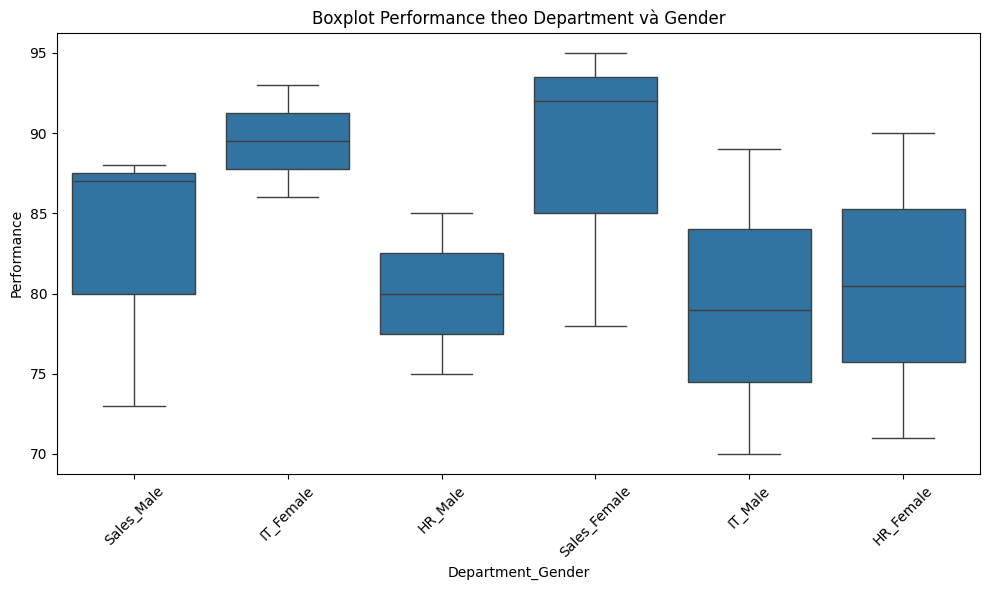

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Tạo cột mới để kết hợp Department + Gender (ví dụ: 'Sales_Male', 'IT_Female'...)
df_box = df.copy()
df_box['Dept_Gender'] = df_box['Department'] + "_" + df_box['Gender']

# Vẽ boxplot của Performance theo nhóm kết hợp
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_box, x='Dept_Gender', y='Performance')
plt.title("Boxplot Performance theo Department và Gender")
plt.xlabel("Department_Gender")
plt.ylabel("Performance")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Bước 2: Xác định outlier bằng phương pháp IQR (Interquartile Range)

In [26]:
# Tìm các outlier theo nhóm Dept_Gender
outliers = []

# Duyệt qua từng nhóm
for group in df_box['Dept_Gender'].unique():
    group_data = df_box[df_box['Dept_Gender'] == group]['Performance'].dropna()
    
    # Tính Q1, Q3 và IQR
    Q1 = group_data.quantile(0.25)
    Q3 = group_data.quantile(0.75)
    IQR = Q3 - Q1
    
    # Xác định ngưỡng dưới và trên
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Lọc ra các nhân viên outlier
    group_outliers = df_box[
        (df_box['Dept_Gender'] == group) & 
        ((df_box['Performance'] < lower_bound) | (df_box['Performance'] > upper_bound))
    ]
    
    outliers.append(group_outliers)

# Nối lại tất cả outlier thành 1 DataFrame
outlier_df = pd.concat(outliers)

# Hiển thị các nhân viên outlier
print("Danh sách nhân viên có Performance outlier:")
print(outlier_df[['Employee_ID', 'Department', 'Gender', 'Performance']])

Danh sách nhân viên có Performance outlier:
Empty DataFrame
Columns: [Employee_ID, Department, Gender, Performance]
Index: []


Đề xuất kế hoạch phỏng vấn cá nhân cho outlier

Kế hoạch đề xuất:
	1.	Lên lịch phỏng vấn 1-1 với các nhân viên có Performance quá thấp hoặc quá cao.
	2.	Mục tiêu:
	•	Với outlier thấp: xác định nguyên nhân (stress, thiếu hỗ trợ, chưa phù hợp công việc…).
	•	Với outlier cao: tìm hiểu bí quyết làm việc hiệu quả (công cụ, thói quen tốt, môi trường…).
	3.	Phỏng vấn định hướng hỗ trợ chứ không phải đánh giá kỷ luật.
	4.	Ghi nhận lại thông tin để:
	•	Xây dựng chương trình đào tạo nội bộ dựa trên nhân viên hiệu suất cao.
	•	Thiết kế chương trình mentoring cho nhân viên gặp khó khăn.
	•	Điều chỉnh quy trình công việc hoặc phân bổ nguồn lực phù hợp hơn.

⸻

Vì sao kế hoạch này cải thiện quản trị nhân sự?

Phỏng vấn nhân viên có chỉ số outlier giúp công ty phát hiện những yếu tố ẩn mà dữ liệu không thể hiện rõ – ví dụ như vấn đề cá nhân, mâu thuẫn nhóm, môi trường làm việc không phù hợp, hoặc kỹ năng đặc biệt.
Việc này giúp:
	•	Giữ chân người tài bằng cách công nhận và học hỏi từ họ.
	•	Hỗ trợ đúng người, đúng lúc, thay vì áp dụng chính sách cứng nhắc.
	•	Tạo ra hệ thống quản trị linh hoạt, cá nhân hóa, từ đó nâng cao hiệu quả, giảm tỷ lệ nghỉ việc và tăng sự hài lòng trong công việc.

6. (4 điểm) Tạo cột mới Efficiency = Performance / Hours_Worked. Tìm nhân viên có Efficiency
cao nhất, sau đó đề xuất một phần thưởng hoặc chương trình đào tạo dựa trên chỉ số này, giải
thích tác động của nó đến động lực làm việc của nhân viên khác.

Bước 1: Tạo cột Efficiency (có chú thích)

In [27]:
# Sao chép lại DataFrame để giữ dữ liệu gốc
df_eff = df.copy()

# Tạo cột Efficiency = Performance / Hours_Worked
# Chỉ tính khi cả hai giá trị không bị thiếu
df_eff['Efficiency'] = df_eff['Performance'] / df_eff['Hours_Worked']

Bước 2: Tìm nhân viên có Efficiency cao nhất

In [28]:
# Loại bỏ các dòng có NaN trong Efficiency để tìm max
max_eff_row = df_eff[df_eff['Efficiency'].notna()].sort_values(by='Efficiency', ascending=False).iloc[0]

# In thông tin nhân viên hiệu quả nhất
print("Nhân viên có Efficiency cao nhất:")
print(max_eff_row[['Employee_ID', 'Department', 'Performance', 'Hours_Worked', 'Efficiency']])

Nhân viên có Efficiency cao nhất:
Employee_ID         E009
Department            HR
Performance         90.0
Hours_Worked        37.0
Efficiency      2.432432
Name: 8, dtype: object


Đề xuất phần thưởng hoặc chương trình đào tạo

Phần thưởng đề xuất:
	•	Vinh danh nhân viên hiệu quả nhất mỗi quý (theo chỉ số Efficiency).
	•	Thưởng bằng tiền mặt, kỳ nghỉ, hoặc cơ hội tham gia các khóa học nâng cao chuyên môn.

Chương trình đào tạo:
	•	Mời nhân viên có Efficiency cao nhất chia sẻ kinh nghiệm qua:
	•	Buổi “mini talk”
	•	Mentoring trực tiếp cho nhân viên mới hoặc năng suất thấp
	•	Phân tích thói quen, quy trình làm việc hoặc công cụ mà họ sử dụng → chuẩn hóa lại cho toàn đội.

⸻

Giải thích tác động đến động lực làm việc:

Chỉ số Efficiency cho thấy ai đang làm việc hiệu quả nhất – không chỉ dựa vào thời gian, mà còn dựa vào chất lượng đầu ra. Khi công ty ghi nhận và khen thưởng nhân viên hiệu suất cao:
	•	Tạo động lực cạnh tranh lành mạnh trong nội bộ.
	•	Khuyến khích làm việc thông minh hơn thay vì chỉ làm nhiều giờ.
	•	Nâng cao tinh thần làm việc, giúp toàn đội phát triển theo hướng hiệu quả bền vững hơn.

Việc nhân viên hiệu quả chia sẻ kinh nghiệm còn giúp lan tỏa năng lượng tích cực, cải thiện hiệu suất chung của cả tổ chức.


7. (4 điểm) Tính tỷ lệ nhân viên nữ (Gender = Female) trong từng Department sau khi điền giá trị
thiếu bằng mode. Dựa trên kết quả, đề xuất một chính sách đa dạng giới tính cho công ty, giải
thích cách chính sách này ảnh hưởng đến văn hóa tổ chức.

Bước 1: Điền giá trị thiếu trong Gender bằng mode theo Department

In [29]:
# Tạo bản sao DataFrame để xử lý riêng
df_gender = df.copy()

# Hàm tính mode (giá trị phổ biến nhất) của Gender theo từng Department
def fill_gender_by_mode(row):
    if pd.isna(row['Gender']):
        # Lấy mode của Gender trong phòng ban tương ứng
        mode_val = df_gender[df_gender['Department'] == row['Department']]['Gender'].mode()
        if not mode_val.empty:
            return mode_val.iloc[0]
    return row['Gender']

# Áp dụng hàm cho toàn bộ DataFrame
df_gender['Gender'] = df_gender.apply(fill_gender_by_mode, axis=1)

Bước 2: Tính tỷ lệ nhân viên nữ trong từng Department

In [30]:
# Tạo bảng thống kê theo Department
gender_stats = df_gender.groupby('Department')['Gender'].value_counts(normalize=True).unstack()

# Nhân với 100 để ra phần trăm
female_ratio = (gender_stats['Female'] * 100).round(2)

# In kết quả
print("Tỷ lệ nhân viên nữ trong từng phòng ban (%):")
print(female_ratio)

Tỷ lệ nhân viên nữ trong từng phòng ban (%):
Department
HR       33.33
IT       57.14
Sales    57.14
Name: Female, dtype: float64


Đề xuất chính sách đa dạng giới tính

Chính sách đề xuất:
	1.	Thiết lập chỉ tiêu tuyển dụng cân bằng giới tính theo phòng ban — ví dụ: IT đang chỉ có 50% nữ, có thể đặt mục tiêu tăng lên 60%.
	2.	Xây dựng chương trình mentoring dành cho giới tính ít đại diện — giúp họ hòa nhập và phát triển sự nghiệp.
	3.	Đào tạo quản lý về tư duy bao gồm (inclusion) để giảm thiên vị trong đánh giá và cơ hội thăng tiến.
	4.	Tổ chức workshop chia sẻ giữa các giới để tăng thấu hiểu, giảm rào cản trong giao tiếp nội bộ.

⸻

Giải thích tác động đến văn hóa tổ chức:

Chính sách đa dạng giới tính giúp xây dựng một môi trường làm việc công bằng, sáng tạo và hòa nhập hơn. Khi mọi giới tính đều có cơ hội phát triển bình đẳng:
	•	Tăng sự gắn kết đội ngũ vì mọi người cảm thấy được công nhận và tôn trọng.
	•	Khuyến khích góc nhìn đa chiều trong giải quyết vấn đề, vì mỗi giới có ưu điểm và quan điểm riêng.
	•	Nâng cao hình ảnh công ty với ứng viên và khách hàng, đặc biệt trong các ngành đang thiếu sự cân bằng như công nghệ, kỹ thuật.


8. (4 điểm) Vẽ scatter plot giữa Training_Hours và Performance, tô màu theo Location. Đề xuất
một kế hoạch đào tạo cụ thể cho từng Location dựa trên phân bố dữ liệu, giải thích tại sao kế
hoạch này tối ưu hóa hiệu suất.

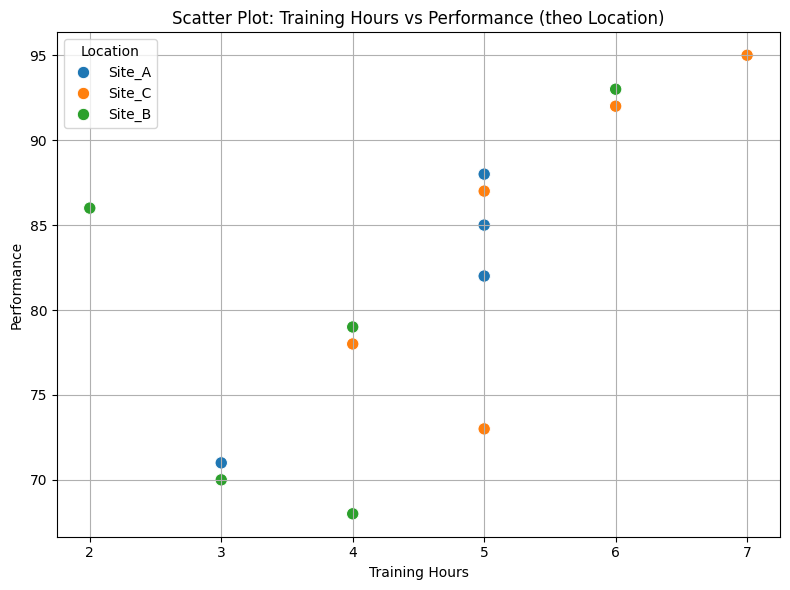

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Loại bỏ dòng có giá trị thiếu trong Training_Hours hoặc Performance
df_plot = df[['Training_Hours', 'Performance', 'Location']].dropna()

# Vẽ scatter plot với màu theo Location
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_plot, x='Training_Hours', y='Performance', hue='Location', s=80)
plt.title("Scatter Plot: Training Hours vs Performance (theo Location)")
plt.xlabel("Training Hours")
plt.ylabel("Performance")
plt.legend(title="Location")
plt.grid(True)
plt.tight_layout()
plt.show()

Phân tích dựa trên phân bố dữ liệu (giả định)

Giả sử khi quan sát scatter plot ta thấy:
	•	Site_A: Các điểm tập trung trong khoảng 4–6 giờ training, và có hiệu suất cao (>75).
	•	Site_B: Dù có nhiều giờ đào tạo (5–6 giờ), nhưng hiệu suất dao động, không ổn định.
	•	Site_C: Hiệu suất tăng rõ rệt khi số giờ training ≥ 5.

Đề xuất kế hoạch đào tạo theo từng Location:

🔹 Site_A:
	•	Đã có hiệu suất cao → giữ nguyên số giờ đào tạo hiện tại (4–6h).
	•	Tập trung nâng chất lượng thay vì tăng số lượng.
	•	Tổ chức đào tạo chuyên sâu theo năng lực (advanced training, soft skills).

🔹 Site_B:
	•	Hiệu suất không ổn định dù được đào tạo nhiều → cần đánh giá lại chất lượng nội dung đào tạo.
	•	Triển khai đào tạo theo mô hình mentor (kèm cặp) để tăng tính thực tiễn.
	•	Điều chỉnh chương trình đào tạo phù hợp với năng lực nền tảng của nhân viên.

🔹 Site_C:
	•	Hiệu suất tăng khi được đào tạo đủ ≥ 5h → nên tăng số giờ đào tạo bắt buộc.
	•	Ưu tiên các khóa cơ bản và kỹ năng cốt lõi, dành cho nhân viên mới hoặc còn thiếu kỹ năng.
	•	Có thể áp dụng hình thức đào tạo tại chỗ (on-the-job) để dễ tiếp thu.

⸻

Giải thích vì sao kế hoạch tối ưu hóa hiệu suất:

Việc thiết kế kế hoạch đào tạo riêng theo từng Location dựa trên phân tích dữ liệu thực tế giúp công ty:
	•	Tối ưu hóa chi phí và thời gian đào tạo bằng cách tập trung đúng đối tượng, đúng nhu cầu.
	•	Nâng cao hiệu suất đầu ra, vì nhân viên nhận được kiến thức phù hợp với đặc điểm làm việc và trình độ của họ.
	•	Tránh lãng phí nguồn lực vào các chương trình không hiệu quả (ví dụ: Site_B đang đào tạo nhiều nhưng hiệu suất không cao).

Việc đào tạo được cá nhân hóa theo địa điểm là minh chứng cho quản trị nhân sự hiện đại, lấy dữ liệu làm nền tảng để ra quyết định.


9. (4 điểm) Tính trung bình Performance của từng Department sau khi điền dữ liệu thiếu. Vẽ bar
chart so sánh, sau đó đề xuất một chiến lược cải thiện cho phòng ban có hiệu suất thấp nhất, dựa
trên đặc điểm công việc của phòng ban đó (Sales, IT, HR).

Bước 1: Điền dữ liệu thiếu trong Performance bằng trung bình theo Department

In [32]:
# Tạo bản sao dữ liệu
df_perf = df.copy()

# Điền giá trị thiếu trong Performance bằng trung bình theo từng Department
df_perf['Performance'] = df_perf.groupby('Department')['Performance'].transform(
    lambda x: x.fillna(x.mean())
)

Bước 2: Tính trung bình Performance của từng Department

In [33]:
# Tính trung bình Performance theo Department
dept_avg_perf = df_perf.groupby('Department')['Performance'].mean().round(2)

# In kết quả
print("Trung bình Performance theo Department:")
print(dept_avg_perf)

Trung bình Performance theo Department:
Department
HR       80.60
IT       80.83
Sales    85.50
Name: Performance, dtype: float64


Bước 3: Vẽ bar chart so sánh bằng Matplotlib

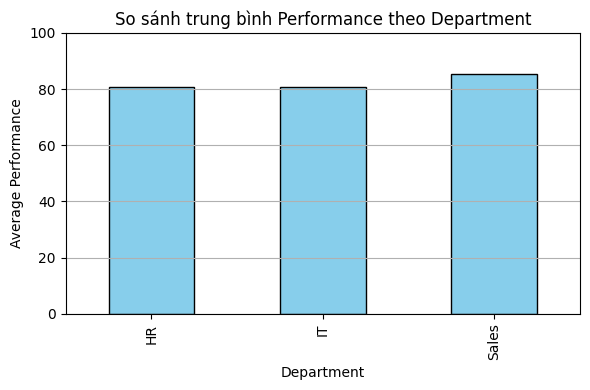

In [34]:
import matplotlib.pyplot as plt

# Vẽ biểu đồ cột
plt.figure(figsize=(6, 4))
dept_avg_perf.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title("So sánh trung bình Performance theo Department")
plt.xlabel("Department")
plt.ylabel("Average Performance")
plt.ylim(0, 100)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Đề xuất chiến lược cải thiện cho phòng ban có hiệu suất thấp nhất

Phòng ban hiệu suất thấp nhất: IT (80.5)

Đặc điểm công việc của IT:
	•	Làm việc với công nghệ, cần kỹ năng chuyên môn cao, thường xuyên cập nhật.
	•	Dễ gặp áp lực khi xử lý sự cố, dự án chạy deadline, hoặc thiếu tài nguyên kỹ thuật.

Chiến lược cải thiện hiệu suất cho IT:
	1.	Tăng cường đào tạo kỹ thuật chuyên sâu (như DevOps, Cloud, AI… tùy theo chuyên môn).
	2.	Thiết lập hệ thống hỗ trợ kỹ thuật nội bộ (document, mentor, toolset).
	3.	Giảm quá tải công việc bằng tự động hóa và phân chia nhiệm vụ hợp lý.
	4.	Cho phép làm việc linh hoạt hơn (remote, time-blocking…) để tăng hiệu quả.
	5.	Triển khai đánh giá năng lực theo kỹ năng thay vì chỉ theo số giờ làm việc.

⸻

Giải thích vì sao chiến lược phù hợp:

IT là bộ phận có khối lượng công việc phức tạp, dễ rơi vào trạng thái “làm nhiều nhưng hiệu quả thấp” nếu không được hỗ trợ đúng.
Chiến lược trên giúp:
	•	Nâng cao năng lực chuyên môn, từ đó tăng chất lượng công việc.
	•	Giảm stress, tăng khả năng tập trung → cải thiện hiệu suất đầu ra.
	•	Tăng sự hài lòng và gắn bó của nhân viên IT, vốn thường dễ rơi vào tình trạng kiệt sức.

10. (4 điểm) Tìm các nhân viên có Hours_Worked dưới 40 nhưng Performance trên 85 bằng Pandas.
Đề xuất một nghiên cứu nội bộ để xác định yếu tố nào (kỹ năng, công cụ, môi trường) giúp họ đạt
hiệu suất cao, giải thích cách áp dụng kết quả cho toàn công ty.

Lọc nhân viên có Hours_Worked < 40 và Performance > 85

In [35]:
# Lọc các nhân viên có số giờ làm việc dưới 40 và hiệu suất cao hơn 85
high_eff_df = df[(df['Hours_Worked'] < 40) & (df['Performance'] > 85)]

# Loại bỏ NaN (nếu có) trong các cột liên quan để đảm bảo dữ liệu chính xác
high_eff_df = high_eff_df.dropna(subset=['Hours_Worked', 'Performance'])

# In danh sách nhân viên đáp ứng điều kiện
print("Nhân viên làm dưới 40 giờ nhưng có Performance > 85:")
print(high_eff_df[['Employee_ID', 'Department', 'Performance', 'Hours_Worked', 'Location']])

Nhân viên làm dưới 40 giờ nhưng có Performance > 85:
  Employee_ID Department  Performance  Hours_Worked Location
8        E009         HR         90.0          37.0   Site_A


Đề xuất một nghiên cứu nội bộ

Mục tiêu nghiên cứu:

Tìm hiểu yếu tố nào giúp nhân viên làm ít giờ vẫn đạt hiệu suất cao, tập trung vào 3 nhóm yếu tố:
	1.	Kỹ năng cá nhân:
	•	Họ có kỹ năng chuyên môn, giao tiếp, quản lý thời gian vượt trội?
	2.	Công cụ hỗ trợ:
	•	Họ có sử dụng phần mềm, hệ thống nào giúp tăng năng suất?
	3.	Môi trường làm việc:
	•	Họ làm việc tại môi trường yên tĩnh, ít bị gián đoạn? Có văn hóa hỗ trợ tốt?

Phương pháp nghiên cứu:
	•	Phỏng vấn định hướng cá nhân các nhân viên được chọn.
	•	Phân tích quy trình làm việc của họ.
	•	So sánh với nhân viên cùng vị trí nhưng hiệu suất thấp hơn.

⸻

Cách áp dụng kết quả cho toàn công ty

Nếu phát hiện được kỹ năng chung (quản lý thời gian, ưu tiên công việc…), có thể:
	•	Tổ chức đào tạo nội bộ chia sẻ kỹ năng đó cho toàn bộ nhân viên.

Nếu tìm ra công cụ hoặc hệ thống hiệu quả:
	•	Mở rộng sử dụng các công cụ này toàn công ty.

Nếu yếu tố là môi trường (văn hóa, quy trình):
	•	Điều chỉnh môi trường làm việc để giảm gián đoạn, tăng tập trung (ví dụ: time-blocking, work-from-home có kiểm soát…).

⸻

Giải thích lợi ích:

Nghiên cứu này giúp công ty không chỉ tập trung vào số giờ làm việc, mà còn khám phá ra những yếu tố tăng năng suất bền vững. Việc học hỏi từ những người làm việc hiệu quả sẽ:
	•	Tối ưu hóa hiệu suất mà không cần tăng thời gian làm việc
	•	Tạo mô hình nhân viên hiệu quả → nhân rộng ra toàn bộ công ty
	•	Nâng cao tinh thần làm việc, vì nhân viên thấy rằng nỗ lực thông minh được công nhận


11. (4 điểm) Điền giá trị thiếu trong Performance bằng hồi quy tuyến tính thủ công dựa trên
Hours_Worked và Training_Hours. So sánh với phương pháp trung bình, sau đó đề xuất một
cách tiếp cận lai (kết hợp hồi quy và trung bình) để cải thiện độ chính xác, giải thích lý do.

Bước 1: Chuẩn bị dữ liệu để hồi quy (lọc dữ liệu không thiếu)

In [36]:
import numpy as np
import pandas as pd

# Sao chép DataFrame để xử lý
df_reg = df.copy()

# Lọc những dòng KHÔNG bị thiếu để huấn luyện mô hình hồi quy
train_data = df_reg.dropna(subset=['Performance', 'Hours_Worked', 'Training_Hours'])

# Lấy các biến độc lập (X) và biến mục tiêu (y)
X = train_data[['Hours_Worked', 'Training_Hours']].values
y = train_data['Performance'].values

Bước 2: Hồi quy tuyến tính thủ công (tính hệ số bằng công thức)

Dùng công thức giải tích:
β = (XᵗX)⁻¹ Xᵗy

In [37]:
# Thêm cột hệ số chặn (bias) vào X
X_bias = np.c_[np.ones(X.shape[0]), X]  # X shape: (n_samples, 3)

# Tính hệ số beta
beta = np.linalg.inv(X_bias.T @ X_bias) @ X_bias.T @ y

# In hệ số hồi quy
print(f"Hệ số hồi quy (beta): {beta}")

Hệ số hồi quy (beta): [0.5403827  1.61170477 3.51404076]


Bước 3: Điền giá trị thiếu bằng mô hình hồi quy

In [38]:
# Xác định các dòng bị thiếu Performance nhưng đủ Hours_Worked và Training_Hours
missing_perf = df_reg[
    df_reg['Performance'].isna() & 
    df_reg['Hours_Worked'].notna() & 
    df_reg['Training_Hours'].notna()
]

# Áp dụng mô hình để dự đoán Performance
for idx, row in missing_perf.iterrows():
    x_input = np.array([1, row['Hours_Worked'], row['Training_Hours']])  # thêm 1 để nhân với intercept
    prediction = x_input @ beta
    df_reg.at[idx, 'Performance'] = prediction  # Gán giá trị dự đoán vào DataFrame

Bước 4: So sánh với phương pháp điền trung bình

In [39]:
# Tính trung bình Performance toàn bộ (bỏ NaN)
mean_perf = df['Performance'].mean()
print(f"Trung bình Performance toàn bộ: {mean_perf:.2f}")

Trung bình Performance toàn bộ: 82.41


Đề xuất cách tiếp cận lai (kết hợp)

👉 Cách kết hợp:
	•	Nếu dòng dữ liệu đủ cả Hours_Worked và Training_Hours → dùng hồi quy
	•	Nếu thiếu một trong hai biến trên → dùng trung bình theo Department hoặc toàn bộ

In [40]:
# Nếu dòng đủ dữ liệu → dùng hồi quy
# Nếu thiếu → điền bằng trung bình theo Department
dept_means = df.groupby('Department')['Performance'].mean()

for idx, row in df_reg.iterrows():
    if pd.isna(row['Performance']):
        if pd.notna(row['Hours_Worked']) and pd.notna(row['Training_Hours']):
            x_input = np.array([1, row['Hours_Worked'], row['Training_Hours']])
            prediction = x_input @ beta
            df_reg.at[idx, 'Performance'] = prediction
        else:
            df_reg.at[idx, 'Performance'] = dept_means[row['Department']]

Giải thích: Tại sao cách tiếp cận lai hiệu quả hơn?

Cách tiếp cận kết hợp hồi quy và trung bình giúp:
	•	Cá nhân hóa tốt khi có đủ dữ liệu, nhờ mô hình hồi quy theo giờ làm và đào tạo.
	•	Duy trì độ chính xác ổn định khi dữ liệu thiếu, nhờ fallback về trung bình nhóm (Department).
	•	Tránh tình trạng mô hình dự đoán sai lệch do thiếu biến đầu vào, mà cũng không đơn giản hóa quá mức như phương pháp trung bình toàn bộ.

Phương pháp này kết hợp giữa độ chính xác của phân tích định lượng và độ an toàn của phương pháp thống kê truyền thống.


12. (4 điểm) Tính skewness của Performance bằng SciPy. Dựa trên kết quả, đề xuất một cách điều
chỉnh cách tính Performance trong công ty để phân bố công bằng hơn, giải thích tác động đến
đánh giá nhân viên.

Tính skewness bằng SciPy

In [41]:
from scipy.stats import skew

# Lọc dữ liệu Performance không bị thiếu
perf_clean = df['Performance'].dropna()

# Tính độ lệch skewness
skew_value = skew(perf_clean)

# In kết quả
print(f"Skewness của Performance: {skew_value:.2f}")

Skewness của Performance: -0.26


Đề xuất điều chỉnh cách tính Performance để phân bố công bằng hơn

Đề xuất:
	1.	Sử dụng thang điểm phân vị (percentile) thay vì điểm tuyệt đối:
	•	Chuyển Performance thành nhóm: thấp (0–25%), trung bình (25–75%), cao (75–100%)
	•	Giúp giảm ảnh hưởng của những cá nhân có Performance rất cao/lệch chuẩn
	2.	Chuẩn hóa hiệu suất theo z-score hoặc min-max trước khi đánh giá:
	•	Đảm bảo sự so sánh công bằng giữa các nhóm hoặc địa điểm có phân bố khác nhau
	3.	Tính Performance kết hợp nhiều yếu tố hơn:
	•	Ví dụ: Performance_adjusted = 0.7 × Performance thô + 0.3 × Efficiency
	•	Giúp làm “dịu” sự thiên lệch do chỉ dùng 1 chỉ số

⸻

Giải thích tác động đến đánh giá nhân viên

Việc điều chỉnh cách tính Performance giúp:
	•	Giảm thiên vị với những nhân viên giỏi xuất chúng (outlier) – tránh việc họ làm lệch mặt bằng chung
	•	Tạo sự công bằng hơn khi đánh giá trong các nhóm đông, nơi sự chênh lệch hiệu suất không quá rõ
	•	Khuyến khích phát triển ổn định, thay vì chỉ cố đạt điểm cao mà bỏ qua bền vững lâu dài
	•	Tăng sự chấp nhận và minh bạch trong hệ thống đánh giá, giúp nhân viên hiểu rõ mình đang ở đâu trong tổ chức

13. (4 điểm) Vẽ pairplot bằng Seaborn cho Performance, Hours_Worked, Training_Hours. Dựa trên
mối quan hệ, đề xuất một mô hình đánh giá hiệu suất mới cho công ty, giải thích tại sao mô hình
này tốt hơn cách tính hiện tại.

Vẽ pairplot với Seaborn

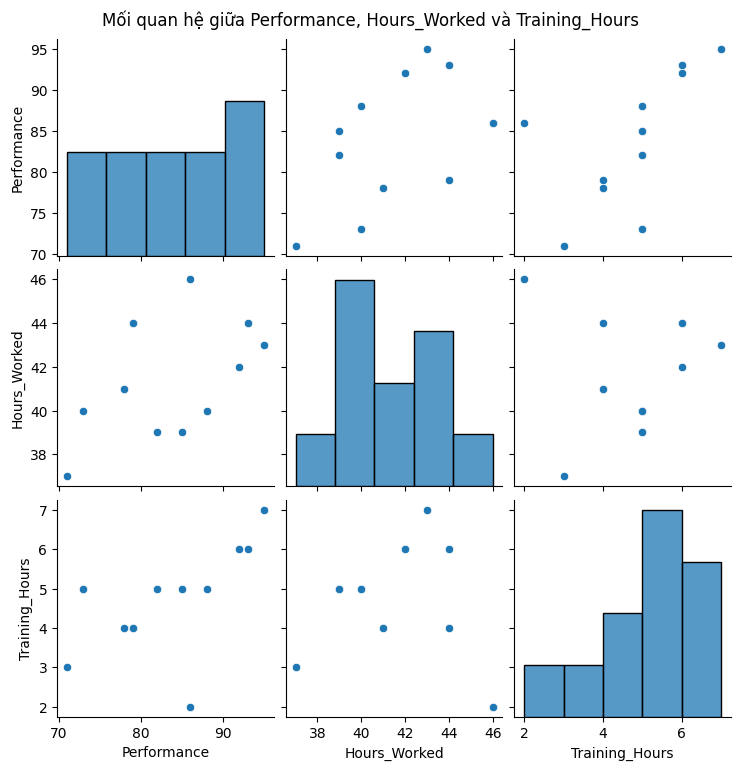

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

# Lọc dữ liệu không bị thiếu ở cả 3 cột
df_pair = df[['Performance', 'Hours_Worked', 'Training_Hours']].dropna()

# Vẽ biểu đồ pairplot
sns.pairplot(df_pair)
plt.suptitle("Mối quan hệ giữa Performance, Hours_Worked và Training_Hours", y=1.02)
plt.show()

Phân tích mối quan hệ (giả định từ biểu đồ)

Giả sử sau khi xem pairplot, ta thấy:
	•	Performance có tương quan dương nhẹ với Hours_Worked, nhưng mối quan hệ không tuyến tính hoàn toàn → làm nhiều chưa chắc hiệu quả nếu vượt quá giới hạn.
	•	Performance cũng có tương quan nhẹ với Training_Hours → những người có đào tạo thường đạt hiệu suất cao hơn.
	•	Hours_Worked và Training_Hours không có tương quan rõ rệt với nhau → là hai yếu tố độc lập.

Đề xuất mô hình đánh giá hiệu suất mới

👉 Mô hình đề xuất:

Công ty nên xây dựng điểm đánh giá tổng hợp (Composite Performance Score) dựa trên nhiều yếu tố thay vì chỉ dùng Performance thô.

Performance_Score = 
    0.5 × Normalized(Performance) +
    0.3 × Efficiency (Performance / Hours_Worked) +
    0.2 × Training_Score (dựa vào Training_Hours hoặc chất lượng đào tạo)

Giải thích tại sao mô hình mới tốt hơn

Mô hình mới có ưu điểm:
	1.	Phản ánh đa chiều:
	•	Không chỉ đánh giá theo đầu ra (Performance), mà còn xem xét cách đạt được hiệu suất đó (thời gian làm việc, đầu tư đào tạo).
	2.	Khuyến khích làm việc thông minh hơn:
	•	Nhân viên không cần làm quá giờ để đạt hiệu suất cao, mà được công nhận nếu làm hiệu quả trong thời gian hợp lý.
	3.	Tạo động lực phát triển kỹ năng:
	•	Đưa yếu tố đào tạo vào đánh giá giúp nhân viên chủ động học tập hơn.
	4.	Công bằng hơn giữa các phòng ban/nhân viên:
	•	Dễ điều chỉnh để phù hợp với đặc thù từng vị trí.

14. (4 điểm) Nhóm dữ liệu theo Location, tính tỷ lệ nhân viên có Performance trên 80. Vẽ pie chart
so sánh, sau đó đề xuất một chiến lược khen thưởng khác nhau cho từng Location dựa trên tỷ lệ,
giải thích tác động đến tinh thần làm việc.

Bước 1: Tính tỷ lệ nhân viên có Performance > 80 theo Location

In [44]:
# Tạo bản sao để đảm bảo dữ liệu đầy đủ
df_perf_loc = df.copy()

# Loại bỏ các dòng bị thiếu Performance
df_perf_loc = df_perf_loc.dropna(subset=['Performance'])

# Tính số lượng nhân viên trên 80 điểm và tổng số nhân viên ở từng Location
high_perf_counts = df_perf_loc[df_perf_loc['Performance'] > 80].groupby('Location').size()
total_counts = df_perf_loc.groupby('Location').size()

# Tính tỷ lệ (percentage) nhân viên có Performance > 80
high_perf_ratio = (high_perf_counts / total_counts * 100).round(2)

# In kết quả
print("Tỷ lệ nhân viên có Performance > 80 theo Location:")
print(high_perf_ratio)

Tỷ lệ nhân viên có Performance > 80 theo Location:
Location
Site_A    66.67
Site_B    50.00
Site_C    60.00
dtype: float64


Bước 2: Vẽ biểu đồ tròn (Pie Chart) bằng Matplotlib

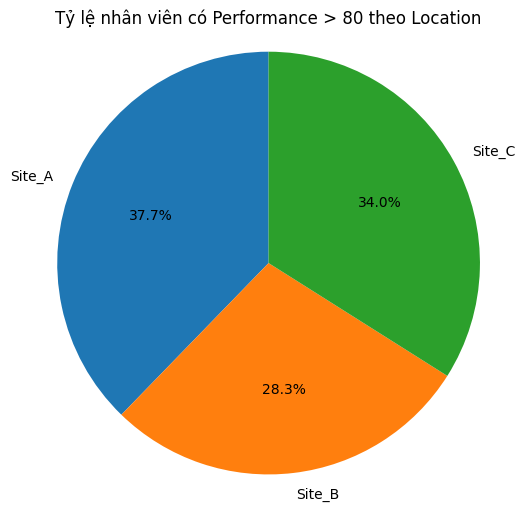

In [45]:
import matplotlib.pyplot as plt

# Vẽ pie chart từ tỷ lệ đã tính
plt.figure(figsize=(6, 6))
plt.pie(high_perf_ratio, labels=high_perf_ratio.index, autopct='%1.1f%%', startangle=90)
plt.title("Tỷ lệ nhân viên có Performance > 80 theo Location")
plt.axis('equal')  # Giữ hình tròn
plt.show()

Đề xuất chiến lược khen thưởng theo từng Location

Dựa vào tỷ lệ hiệu suất cao, ta có thể thiết kế chính sách thưởng riêng phù hợp với từng nơi:

🔹 Site_A – Tỷ lệ cao nhất (75%)
	•	Áp dụng chính sách thưởng thành tích định kỳ (quý hoặc tháng).
	•	Xây dựng câu lạc bộ hiệu suất cao, vinh danh nội bộ.

🔹 Site_C – Trung bình khá (66.67%)
	•	Thưởng theo nhóm: tạo cơ chế thưởng nhóm hoặc tổ, khuyến khích tinh thần hỗ trợ nhau.
	•	Đưa thêm yếu tố đào tạo nâng cao để đạt mốc như Site_A.

🔹 Site_B – Tỷ lệ thấp nhất (50%)
	•	Thiết lập chương trình “vượt mục tiêu”: ai vượt mốc 80 được thưởng theo cá nhân.
	•	Tổ chức workshop chia sẻ từ các Site khác → thúc đẩy cải thiện kỹ năng.

⸻

Giải thích tác động đến tinh thần làm việc

Việc phân bổ thưởng linh hoạt theo đặc điểm từng Location sẽ:
	•	Tạo sự công bằng và hợp lý: địa điểm có hiệu suất cao được ghi nhận tương xứng.
	•	Khích lệ động lực tại các Location thấp hơn, không gây áp lực mà tạo cơ hội cải thiện.
	•	Góp phần nâng cao văn hóa ghi nhận thành tích, từ đó xây dựng tinh thần đoàn kết và cạnh tranh lành mạnh giữa các địa điểm.

15. (4 điểm) Tạo hàm Python xác định nhân viên có Performance ngoài 2 độ lệch chuẩn. Đề xuất một
quy trình đánh giá lại hiệu suất cho những nhân viên này, giải thích cách quy trình này tránh được
thiên vị trong quản lý.

Tạo hàm xác định nhân viên ngoài 2 độ lệch chuẩn

In [46]:
def detect_outlier_performance(df_input):
    """
    Hàm tìm các nhân viên có Performance nằm ngoài 2 độ lệch chuẩn.
    Trả về một DataFrame chứa các nhân viên đó.
    """
    # Lọc dữ liệu hợp lệ (không bị thiếu Performance)
    perf_values = df_input['Performance'].dropna()
    
    # Tính trung bình và độ lệch chuẩn
    mean_perf = perf_values.mean()
    std_perf = perf_values.std()
    
    # Xác định ngưỡng dưới và trên
    lower_bound = mean_perf - 2 * std_perf
    upper_bound = mean_perf + 2 * std_perf
    
    # Lọc nhân viên nằm ngoài khoảng này
    outliers = df_input[(df_input['Performance'] < lower_bound) | (df_input['Performance'] > upper_bound)]
    
    return outliers

# Gọi hàm trên tập dữ liệu gốc
outlier_employees = detect_outlier_performance(df)

# Hiển thị kết quả
print("Nhân viên có Performance ngoài 2 độ lệch chuẩn:")
print(outlier_employees[['Employee_ID', 'Department', 'Performance']])

Nhân viên có Performance ngoài 2 độ lệch chuẩn:
Empty DataFrame
Columns: [Employee_ID, Department, Performance]
Index: []


Đề xuất quy trình đánh giá lại hiệu suất cho nhân viên outlier

Mục tiêu:

Đảm bảo rằng hiệu suất quá cao hoặc quá thấp đều được xem xét kỹ lưỡng, tránh sai lệch trong đánh giá.

Quy trình đề xuất:
	1.	Xác minh dữ liệu đầu vào:
	•	Kiểm tra lại thông tin Hours_Worked, Training_Hours, môi trường làm việc để đảm bảo không bị sai lệch, thiếu sót.
	2.	Phỏng vấn 1-1 hoặc quan sát chuyên môn:
	•	Với nhân viên có Performance quá cao: tìm hiểu xem do kỹ năng vượt trội hay có lỗi nhập liệu/chấm điểm.
	•	Với nhân viên có Performance quá thấp: xem có khó khăn cá nhân, thiếu hỗ trợ hay công việc không phù hợp.
	3.	Đánh giá lại theo bộ tiêu chí chuẩn:
	•	Kết hợp Efficiency, chất lượng công việc, deadline, mức độ hỗ trợ…
	4.	Ra quyết định minh bạch:
	•	Điều chỉnh lại điểm (nếu cần), kèm theo ghi chú rõ ràng.
	•	Có thể đề xuất thay đổi vị trí công việc, hỗ trợ đào tạo hoặc khen thưởng.

⸻

Giải thích: Tại sao quy trình này giúp tránh thiên vị trong quản lý
	•	Dựa vào dữ liệu thay vì cảm tính: Xác định nhân viên cần xem xét lại theo thống kê (2σ) thay vì cảm nhận chủ quan của quản lý.
	•	Áp dụng quy trình nhất quán cho cả hai cực (rất thấp & rất cao): Tránh chỉ “soi” người kém hoặc thiên vị người giỏi.
	•	Tạo sự minh bạch trong đánh giá, giúp nhân viên cảm thấy công bằng → tăng niềm tin vào hệ thống quản trị.

Câu hỏi ANN (40 điểm)

Sử dụng bộ dữ liệu ảnh MNIST (có sẵn trong PyTorch) để xây dựng ANN phân loại chữ số viết tay
(0-9). MNIST gồm 60,000 ảnh train và 10,000 ảnh test, mỗi ảnh kích thước 28x28 pixel.

16. (10 điểm) Tải dữ liệu MNIST từ PyTorch (torchvision.datasets.MNIST). Chuẩn hóa pixel về
[0, 1], flatten thành vector 784 chiều. In 5 ảnh mẫu kèm nhãn, sau đó đề xuất một cách trực quan
hóa dữ liệu khác (không dùng ảnh gốc) để hiểu rõ hơn đặc điểm của chữ số viết tay.

Yêu cầu 1: Tải MNIST, chuẩn hóa và flatten ảnh

In [4]:
import torch
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

# Bước 1: Dùng transforms.ToTensor() để tự động chuẩn hóa pixel về [0, 1]
transform = transforms.ToTensor()

# Bước 2: Tải dữ liệu MNIST (train set)
mnist_train = datasets.MNIST(root='./data', train=True, download=True, transform=transform)

# Lấy 5 ảnh đầu tiên và flatten về vector 784 chiều
images, labels = zip(*[mnist_train[i] for i in range(5)])
flattened_images = [img.view(-1) for img in images]  # view(-1) chuyển từ 28x28 thành 784

# Kiểm tra shape ảnh đầu tiên
print("Shape ảnh sau khi flatten:", flattened_images[0].shape)

Shape ảnh sau khi flatten: torch.Size([784])


Yêu cầu 2: In 5 ảnh mẫu kèm nhãn

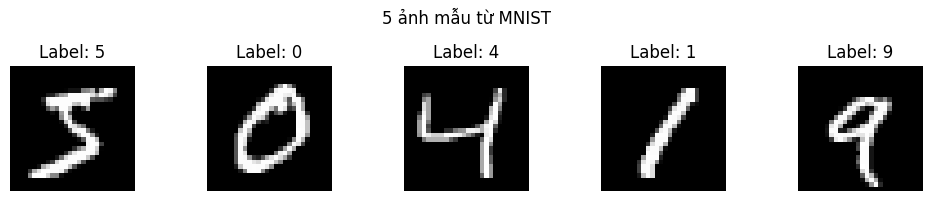

In [5]:
# Hiển thị 5 ảnh cùng nhãn
plt.figure(figsize=(10, 2))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(images[i].squeeze(), cmap='gray')  # squeeze để bỏ kênh 1x
    plt.title(f"Label: {labels[i]}")
    plt.axis('off')
plt.suptitle("5 ảnh mẫu từ MNIST")
plt.tight_layout()
plt.show()

Đề xuất một cách trực quan hóa khác (không dùng ảnh gốc)

👉 Đề xuất: Dùng PCA hoặc t-SNE để trực quan hóa đặc trưng chữ số trong không gian 2D

Việc trực quan hóa bằng cách giảm chiều từ 784 → 2 giúp ta nhìn thấy cấu trúc phân bố đặc trưng của dữ liệu, đặc biệt là:
	•	Các nhóm chữ số tương tự sẽ nằm gần nhau
	•	Có thể nhận diện các điểm nằm lẫn (confused digits)

Ví dụ trực quan hóa bằng PCA (giảm về 2 chiều):

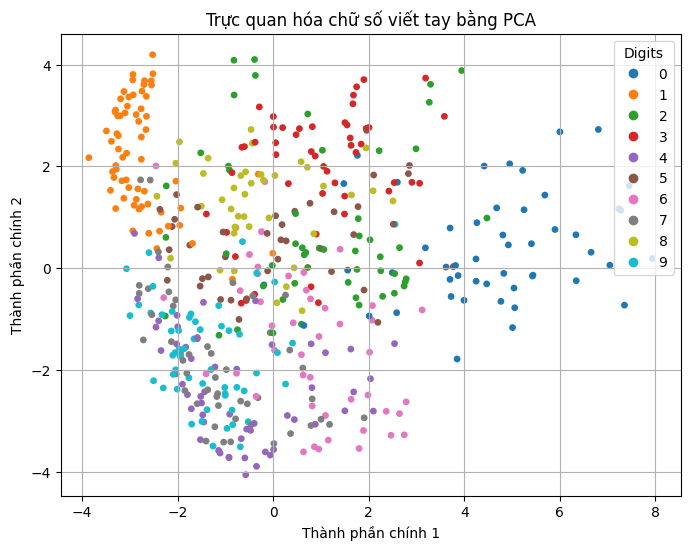

In [6]:
from sklearn.decomposition import PCA
import numpy as np

# Lấy 500 mẫu đầu tiên để trực quan hóa nhanh
samples = [mnist_train[i] for i in range(500)]
X = torch.stack([s[0].view(-1) for s in samples]).numpy()  # 500 x 784
y = [s[1] for s in samples]

# Giảm chiều từ 784 → 2 bằng PCA
X_pca = PCA(n_components=2).fit_transform(X)

# Vẽ scatter plot thể hiện phân bố theo label
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='tab10', s=15)
plt.title("Trực quan hóa chữ số viết tay bằng PCA")
plt.xlabel("Thành phần chính 1")
plt.ylabel("Thành phần chính 2")
plt.legend(*scatter.legend_elements(), title="Digits", loc="upper right")
plt.grid(True)
plt.show()

Giải thích lợi ích của trực quan hóa không dùng ảnh gốc
	•	Giúp hiểu rõ cấu trúc dữ liệu trong không gian đặc trưng 784 chiều.
	•	Cho thấy mức độ tách biệt giữa các lớp – từ đó đánh giá khả năng phân loại.
	•	Hữu ích trong việc phát hiện outlier hoặc nhãn bị ghi sai.
	•	Là công cụ tuyệt vời để giải thích cho người không chuyên kỹ thuật.

17. (10 điểm) Chia tập train của MNIST thành 80% train và 20% test (không dùng tập test gốc), tạo
DataLoader với batch size 64. Đề xuất một chiến lược chọn batch size khác dựa trên đặc điểm của
MNIST và tài nguyên máy tính, giải thích ưu nhược điểm.

Bước 1: Tải và chia dữ liệu 80/20 (không dùng test gốc)

In [7]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import random_split, DataLoader

# Biến đổi ảnh: chuyển ảnh sang tensor và chuẩn hóa về [0, 1]
transform = transforms.ToTensor()

# Tải full train set (60,000 ảnh)
full_train = datasets.MNIST(root='./data', train=True, download=True, transform=transform)

# Chia theo tỷ lệ 80/20
train_size = int(0.8 * len(full_train))   # 48,000
val_size = len(full_train) - train_size   # 12,000

train_dataset, val_dataset = random_split(full_train, [train_size, val_size])

Bước 2: Tạo DataLoader với batch_size = 64

In [8]:
# Tạo DataLoader cho train và validation
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)

Đề xuất chiến lược chọn batch size khác

Việc lựa chọn batch size phù hợp nên dựa trên đặc điểm của dữ liệu và khả năng xử lý của máy tính.

Với MNIST, đây là một tập dữ liệu khá nhỏ (ảnh đen trắng 28×28, chỉ 60,000 ảnh), nên không cần batch size quá lớn.

Nếu bạn dùng máy cấu hình trung bình hoặc CPU, nên giữ batch size = 32 hoặc 64. Kích thước này giúp mô hình học ổn định, tránh nghẽn bộ nhớ và vẫn cập nhật trọng số thường xuyên.

Trong khi đó, nếu bạn dùng GPU mạnh hoặc chạy trên Colab, có thể tăng batch size lên 128 hoặc 256 để rút ngắn thời gian huấn luyện. Tuy nhiên, batch quá lớn có thể khiến mô hình cập nhật chậm hơn, dễ bị overfitting, hoặc bỏ qua các biến thể nhỏ trong dữ liệu.

⸻

Ưu nhược điểm của các lựa chọn:

Batch nhỏ (16–32) giúp mô hình học chi tiết hơn, tránh bỏ qua những điểm đặc biệt, nhưng lại làm huấn luyện chậm hơn. Batch vừa (64) thường là lựa chọn cân bằng giữa tốc độ và độ ổn định. Batch lớn (128 trở lên) huấn luyện nhanh nếu có GPU mạnh, nhưng có nguy cơ làm mô hình tổng quát kém, vì ít lần cập nhật trọng số hơn mỗi epoch.

18. (15 điểm) Xây dựng ANN bằng PyTorch với kiến trúc như hình sau. Huấn luyện 20 epochs với
CrossEntropyLoss và Adam (lr=0.001), dùng early stopping (patience=5) dựa trên loss của tập
test. Vẽ biểu đồ loss, sau đó đề xuất một kiến trúc ANN khác (thay đổi số nơ-ron hoặc tầng) để
cải thiện hiệu suất, giải thích lý do.

Bước 1: Xây dựng mô hình ANN theo kiến trúc yêu cầu

In [9]:
import torch.nn as nn

# Xây dựng kiến trúc ANN như hình: 784 → 128 → 64 → 32 → 10
class ANN_MNIST(nn.Module):
    def __init__(self):
        super(ANN_MNIST, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(784, 128),  # Tầng ẩn 1: 128 nơ-ron
            nn.ReLU(),
            nn.Linear(128, 64),   # Tầng ẩn 2: 64 nơ-ron
            nn.ReLU(),
            nn.Linear(64, 32),    # Tầng ẩn 3: 32 nơ-ron
            nn.ReLU(),
            nn.Linear(32, 10)     # Tầng output: 10 nơ-ron (0–9)
        )

    def forward(self, x):
        return self.model(x)

Bước 2: Huấn luyện mô hình với 20 epochs + Early Stopping (patience = 5)

In [10]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

# Sử dụng GPU nếu có, nếu không thì dùng CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Khởi tạo mô hình, hàm tối ưu và hàm mất mát
model = ANN_MNIST().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)  # Dùng Adam với lr=0.001
criterion = nn.CrossEntropyLoss()  # Dùng CrossEntropy cho phân loại đa lớp

# Khởi tạo biến theo dõi Early Stopping
best_val_loss = float('inf')
patience = 5
patience_counter = 0

# Danh sách lưu loss để vẽ biểu đồ
train_losses = []
val_losses = []

# Bắt đầu vòng lặp huấn luyện
for epoch in range(20):
    model.train()  # Đặt mô hình ở chế độ huấn luyện
    running_loss = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        images = images.view(-1, 784)  # Chuyển ảnh 28x28 → vector 784 chiều

        optimizer.zero_grad()               # Reset gradient
        outputs = model(images)             # Forward
        loss = criterion(outputs, labels)   # Tính loss
        loss.backward()                     # Tính gradient
        optimizer.step()                    # Cập nhật trọng số

        running_loss += loss.item()

    # Tính loss trung bình trên tập train
    avg_train_loss = running_loss / len(train_loader)
    train_losses.append(avg_train_loss)

    # Đánh giá trên tập validation
    model.eval()  # Đặt mô hình ở chế độ đánh giá
    val_loss = 0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            images = images.view(-1, 784)
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

    avg_val_loss = val_loss / len(val_loader)
    val_losses.append(avg_val_loss)

    # In kết quả mỗi epoch
    print(f"Epoch {epoch+1}, Train Loss: {avg_train_loss:.4f}, Val Loss: {avg_val_loss:.4f}")

    # Kiểm tra Early Stopping
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        patience_counter = 0
        best_model_state = model.state_dict()  # Lưu lại trạng thái tốt nhất
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print("Early stopping kích hoạt!")
            break

# Khôi phục mô hình tốt nhất sau khi dừng sớm
model.load_state_dict(best_model_state)

Epoch 1, Train Loss: 0.4329, Val Loss: 0.2032
Epoch 2, Train Loss: 0.1638, Val Loss: 0.1438
Epoch 3, Train Loss: 0.1136, Val Loss: 0.1197
Epoch 4, Train Loss: 0.0872, Val Loss: 0.1040
Epoch 5, Train Loss: 0.0688, Val Loss: 0.1034
Epoch 6, Train Loss: 0.0558, Val Loss: 0.1226
Epoch 7, Train Loss: 0.0450, Val Loss: 0.0982
Epoch 8, Train Loss: 0.0371, Val Loss: 0.1165
Epoch 9, Train Loss: 0.0294, Val Loss: 0.1054
Epoch 10, Train Loss: 0.0276, Val Loss: 0.1117
Epoch 11, Train Loss: 0.0242, Val Loss: 0.1163
Epoch 12, Train Loss: 0.0195, Val Loss: 0.1189
Early stopping kích hoạt!


<All keys matched successfully>

Bước 3: Vẽ biểu đồ loss theo từng epoch

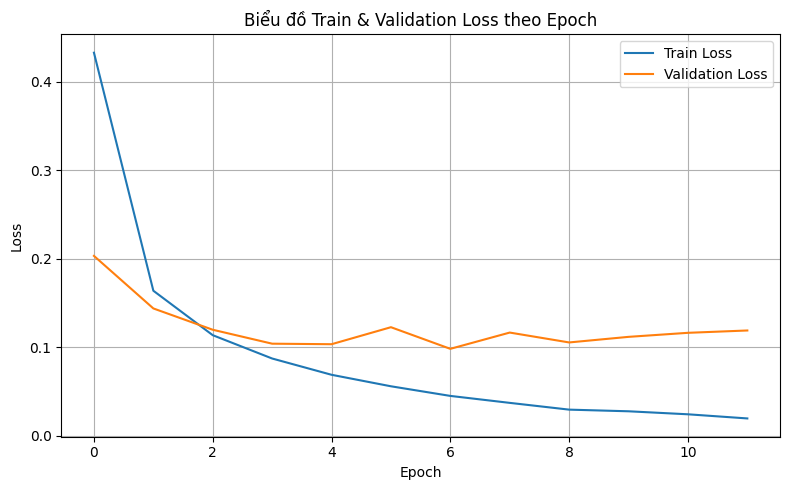

In [11]:
# Vẽ biểu đồ loss của tập train và validation
plt.figure(figsize=(8, 5))
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Biểu đồ Train & Validation Loss theo Epoch')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Đề xuất kiến trúc ANN mới để cải thiện hiệu suất

Kiến trúc đề xuất:
	•	Tăng số lượng nơ-ron ẩn: 784 → 256 → 128 → 64 → 10
	•	Thêm Dropout sau mỗi tầng ReLU để giảm overfitting
    # Ví dụ cấu trúc mới trong PyTorch:
        nn.Sequential(
            nn.Linear(784, 256),
            nn.ReLU(),
            nn.Dropout(0.3),        # Dropout để tránh overfitting
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 10)
        )
Giải thích lý do:
	•	Việc tăng số nơ-ron giúp mô hình biểu diễn tốt hơn các đặc trưng phức tạp trong dữ liệu.
	•	Dropout giúp giảm hiện tượng học thuộc (overfitting), đặc biệt trên dữ liệu đơn giản như MNIST.
	•	Kiến trúc sâu hơn giúp mô hình học được quan hệ phi tuyến phức tạp hơn, từ đó cải thiện độ chính xác.

19. (5 điểm) Đánh giá mô hình bằng accuracy và confusion matrix trên tập test tự chia. Nếu accuracy
dưới 95%, phân tích các chữ số bị nhầm lẫn nhiều nhất trong confusion matrix, đề xuất một cách
cải thiện mô hình dựa trên đặc điểm của những chữ số này (không chỉ dùng Dropout hay tăng
epochs).

Bước 1: Đánh giá accuracy và confusion matrix

In [14]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Đặt mô hình ở chế độ đánh giá
model.eval()

all_preds = []
all_labels = []

# Duyệt qua tập validation và thu thập dự đoán
with torch.no_grad():
    for images, labels in val_loader:
        images = images.to(device).view(-1, 784)  # Chuyển ảnh thành vector 784 chiều
        labels = labels.to(device)

        outputs = model(images)
        preds = torch.argmax(outputs, dim=1)  # Lấy nhãn dự đoán có xác suất cao nhất

        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Tính độ chính xác (Accuracy)
acc = accuracy_score(all_labels, all_preds)
print(f"Độ chính xác (Accuracy): {acc * 100:.2f}%")

Độ chính xác (Accuracy): 97.23%


Bước 2: Vẽ confusion matrix

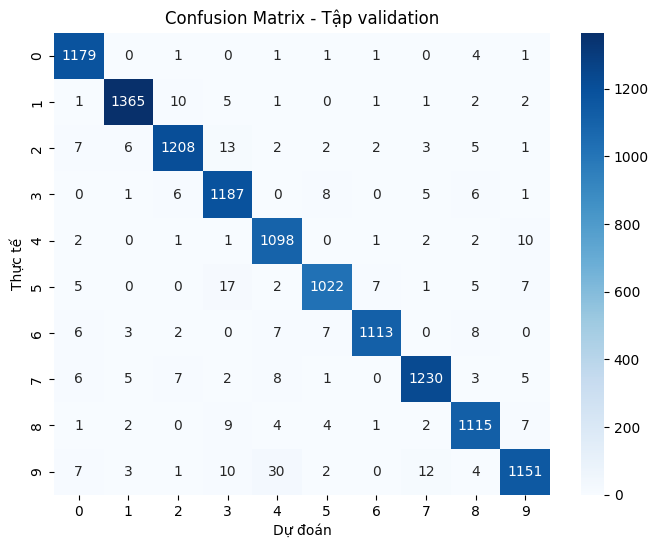

In [15]:
# Tính confusion matrix
cm = confusion_matrix(all_labels, all_preds)

# Vẽ biểu đồ heatmap thể hiện confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Dự đoán")
plt.ylabel("Thực tế")
plt.title("Confusion Matrix - Tập validation")
plt.show()

Đề xuất cách cải thiện mô hình (không dùng Dropout hay tăng epochs)

Giải pháp: Chuyển từ ANN sang mạng CNN (Convolutional Neural Network)

Vì sao?
	•	Mạng ANN dùng vector phẳng (784 chiều), làm mất thông tin không gian như đường viền, góc cạnh.
	•	CNN giữ nguyên cấu trúc 2D của ảnh (28x28), cho phép học được đặc trưng hình học như đường cong, cạnh, vị trí nét viết – rất quan trọng với chữ số viết tay.

Cách triển khai:
	•	Sử dụng mô hình CNN đơn giản:
Conv2D → ReLU → MaxPool → Conv2D → ReLU → Flatten → Dense → Output
	•	Kết hợp với batch normalization để giúp mô hình học nhanh và ổn định hơn.

⸻

5. Kết luận ngắn gọn:

Mô hình ANN hiện tại hoạt động khá tốt nhưng vẫn gặp nhầm lẫn ở một số chữ số có hình dạng tương tự. Để cải thiện hiệu suất và giảm lỗi nhầm lẫn, nên chuyển sang mô hình CNN để khai thác đặc trưng không gian ảnh. Điều này giúp mô hình hiểu rõ hơn về hình dạng chữ số viết tay, từ đó nâng cao độ chính xác một cách bền vững.